# 1. Import and Install Dependencies

In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import tensorflow as tf
# import mediapipe as mp
# from utils.detector import Detector
# from utils.extractor import Extractor

# 2. Call detector class

In [9]:
mp_detect = Detector()

In [ ]:
# for testing

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# 3. Setup Folders for Collection

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Dataset_Keypoints_Data_wo_face2')
# DATA_PATH = os.path.join('Dataset_Keypoints_Data_wo_face_sintetic') 

# Actions that we try to detect
actions = np.array(['halo', 'nama', 'aku', 'perkenalkan', 'r', 'kami', 'd', 'a', 'n', 'i', 'y', 'l', 'u', 'g', 'm', 'NOTHING'])

# 140 videos worth of data
no_sequences = 200

# Videos are going to be 50 frames in length
sequence_length = 50

# Folder start
# start_folder = 1

In [ ]:
# for action in actions: 
# dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, '1'))).astype(int))
for action in actions: 
    for sequence in range(200):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 4. Collect Keypoint Values for Training and Testing

In [ ]:
# actions = np.array(['halo', 'nama', 'aku', 'perkenalkan', 'r', 'kami', 'd', 'a', 'n', 'i', 'y', 'l', 'u', 'g', 'm', 'NOTHING'])
actions = np.array(['y', 'l', 'u', 'g', 'm'])

In [ ]:
clear = lambda: os.system('cls')
    # clear()

In [ ]:
for action in actions:
    for sequence in range(150):
        # seq = sequence + 3 - 150
        os.system('cls')

        clear = lambda: os.system('cls')

        clear()
        cap = cv2.VideoCapture("F:/Work/2022/ifest-bisindo-translator/ml/dataset/{}/{}.mp4".format(action, sequence))
        print('video ke {}'.format(sequence))
        with mp_detect.mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            for frame_num in range(sequence_length):
                if frame_num > 2:
                    # Read feed
                    ret, frame = cap.read()

                    # Make detections
                    image, results = mp_detect.mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    mp_detect.draw_styled_landmarks(image, results)
                    
                    keypoints = mp_detect.extract_keypoints(results)
                    # 
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num-3))
                    np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                        
        cap.release()
        cv2.destroyAllWindows()

In [ ]:
print(keypoints)


# 5. Preprocess Data and Create Labels and Features

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [6]:
# # actions = np.array(['hai', 'halo', 'nama', 'aku', 'saya','a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x' ,'y' ,'z'])
# actions = np.array(['hai', 'halo', 'nama', 'aku', 'saya', 'a','b', 'c'])
actions = np.array(['a', 'aku', 'b', 'benar', 'c', 'd', 'dan', 
                    'e', 'f', 'g', 'h', 'halo', 'i', 'j', 'k', 
                    'kami', 'kamu', 'kapan', 'kenapa', 'l', 'm', 
                    'maaf', 'malam', 'n', 'nama', 'NOTHING', 'o', 
                    'ok', 'p', 'pagi', 'perkenalkan', 'q', 'r', 
                    's', 'sama sama', 'sayang', 'sedang', 'selamat', 
                    'senang', 'siang', 'sore', 't', 'terima kasih', 
                    'tolong', 'u', 'v', 'w', 'x', 'y', 'z'])


In [7]:
label_map = {label:num for num, label in enumerate(actions)}

In [8]:
label_map

{'a': 0,
 'aku': 1,
 'b': 2,
 'benar': 3,
 'c': 4,
 'd': 5,
 'dan': 6,
 'e': 7,
 'f': 8,
 'g': 9,
 'h': 10,
 'halo': 11,
 'i': 12,
 'j': 13,
 'k': 14,
 'kami': 15,
 'kamu': 16,
 'kapan': 17,
 'kenapa': 18,
 'l': 19,
 'm': 20,
 'maaf': 21,
 'malam': 22,
 'n': 23,
 'nama': 24,
 'NOTHING': 25,
 'o': 26,
 'ok': 27,
 'p': 28,
 'pagi': 29,
 'perkenalkan': 30,
 'q': 31,
 'r': 32,
 's': 33,
 'sama sama': 34,
 'sayang': 35,
 'sedang': 36,
 'selamat': 37,
 'senang': 38,
 'siang': 39,
 'sore': 40,
 't': 41,
 'terima kasih': 42,
 'tolong': 43,
 'u': 44,
 'v': 45,
 'w': 46,
 'x': 47,
 'y': 48,
 'z': 49}

In [9]:
DATA_PATH = os.path.join('dataset', 'Keypoint_Data_50class') 
sequences, labels = [], []
for action in actions:
    # for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
    for sequence in range(210):    
        window = []
        window = np.load(os.path.join(DATA_PATH, action, "{}.npy".format(str(sequence))))
        # for frame_num in range(45):
        #     # res = np.load("F:/Work/2022/ifest-bisindo-translator/ml/Dataset_Keypoints_Data/{}/{}.npy".format(action, frame_num))
        #     res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
        #     window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [10]:
np.array(sequences).shape

(10500, 23, 174)

In [11]:
np.array(labels).shape

(10500,)

In [12]:
X = np.array(sequences)

In [13]:
X.shape

(10500, 23, 174)

In [14]:
y = to_categorical(labels).astype(int)

In [15]:
X_train, X, y_train, y = train_test_split(X, y, test_size=0.1, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5, shuffle=True)

In [16]:
y_test.shape

(525, 50)

In [17]:
y_val.shape

(525, 50)

In [ ]:
__dataname = ['X_test', 'y_test', 'X_train', 'X_val', 'y_train', 'y_val']
__data = [X_test,y_test, X_train, X_val, y_train, y_val]

for i in range(6):
    with open('{}.txt'.format(__dataname[i]), 'w') as f:
        f.write(__dataname[i])

In [ ]:
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, train_size=0.5, shuffle=True)
x_train_ = [X_train1, X_train2]
y_train_ = [y_train1, y_train2]

# 7. Build and Train LSTM Neural Network

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, GRU, Conv1D
from tensorflow.keras.callbacks import TensorBoard, Callback
from tensorflow.keras.optimizers import Adam
# from utils.model import Model

In [19]:
class trainingCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    
    # Check accuracy
    # if(logs.get('categorical_accuracy') < 0.95  and logs.get('loss') < 0.35 and logs.get('val_loss') < 0.35):
    if((logs.get('categorical_accuracy') > 0.93) or (logs.get('categorical_accuracy') > 0.90  and logs.get('loss') > logs.get('val_loss'))):
      # Stop if threshold is met
      print("\nAccuracy grater than 0.90 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = trainingCallback()

In [52]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [20]:
# LSTM Model
model_LSTM = Sequential()
model_LSTM.add(LSTM(128, return_sequences=False, activation='relu', input_shape=(23,174)))
model_LSTM.add(Dropout(0.5))
# model_LSTM.add(LSTM(128, return_sequences=True, activation='relu'))
# model_LSTM.add(LSTM(128, return_sequences=False, activation='relu'))
# model_LSTM.add(Flatten())
model_LSTM.add(Dense(256, activation='relu'))
# model_LSTM.add(Dropout(0.5))
# model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dropout(0.5))
model_LSTM.add(Dense(50, activation='softmax'))
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               155136    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                12850     
                                                                 
Total params: 201,010
Trainable params: 201,010
Non-trainable params: 0
_________________________________________________________________


In [35]:
# New LSTM Model
inputs = tf.keras.layers.Input(shape=(23,174))
x_1, w, h = tf.keras.layers.LSTM(128, return_sequences=False, activation='relu', return_state=True)(inputs)
x = tf.keras.layers.Dropout(0.5)(x_1)
# x = tf.keras.layers.LSTM(128, return_sequences=False, activation='relu')(x, initial_state=[w, h])
concat = tf.keras.layers.concatenate([x, w, h])
# flatten = tf.keras.layers.Flatten(concat)
x = tf.keras.layers.Dense(256, activation='relu')(concat)
x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
out = tf.keras.layers.Dense(50, activation='softmax', name='output')(x)
model_LSTM = tf.keras.Model(inputs, out)
model_LSTM.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 23, 174)]    0           []                               
                                                                                                  
 lstm_1 (LSTM)                  [(None, 128),        155136      ['input_1[0][0]']                
                                 (None, 128),                                                     
                                 (None, 128)]                                                     
                                                                                                  
 dropout_2 (Dropout)            (None, 128)          0           ['lstm_1[0][0]']                 
                                                                                              

In [111]:
# GRU Model
model_GRU = Sequential()
model_GRU.add(GRU(256, return_sequences=True, activation='relu', input_shape=(23,174), reset_after = False))
model_GRU.add(Dropout(0.6))
# model_GRU.add(GRU(128, return_sequences=True, activation='relu'))
model_GRU.add(GRU(128, return_sequences=False, activation='relu', reset_after = False))
# model_GRU.add(Conv1DTranspose(64, 3, activation='relu'))
# model_GRU.add(Flatten())
model_GRU.add(Dense(256, activation='relu'))
model_GRU.add(Dropout(0.6))
model_GRU.add(Dense(128, activation='relu'))
model_GRU.add(Dropout(0.6))
model_GRU.add(Dense(50, activation='softmax'))

In [112]:
model_GRU.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 23, 256)           331008    
                                                                 
 dropout_18 (Dropout)        (None, 23, 256)           0         
                                                                 
 gru_13 (GRU)                (None, 128)               147840    
                                                                 
 dense_18 (Dense)            (None, 256)               33024     
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_20 (Dropout)        (None, 128)              

In [ ]:
# GRU-LSTM Model
model_GRU_LSTM = Sequential()
model_GRU_LSTM.add(GRU(128, return_sequences=True, activation='relu', input_shape=(45,174)))
model_GRU_LSTM.add(Dropout(0.5))
model_GRU_LSTM.add(LSTM(128, return_sequences=True, activation='relu'))
# model_GRU_LSTM.add(LSTM(128, return_sequences=False, activation='relu'))
model_GRU_LSTM.add(Flatten())
model_GRU_LSTM.add(Dense(256, activation='relu'))
model_GRU_LSTM.add(Dropout(0.5))
model_GRU_LSTM.add(Dense(64, activation='relu'))
model_GRU_LSTM.add(Dropout(0.5))
model_GRU_LSTM.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
# LSTM-GRU Model
model_LSTM_GRU = Sequential()
model_LSTM_GRU.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(45,174)))
model_LSTM_GRU.add(Dropout(0.5))
model_LSTM_GRU.add(GRU(128, return_sequences=True, activation='relu'))
# model_LSTM_GRU.add(GRU(128, return_sequences=False, activation='relu'))
model_LSTM_GRU.add(Flatten())
model_LSTM_GRU.add(Dense(256, activation='relu'))
model_LSTM_GRU.add(Dropout(0.5))
model_LSTM_GRU.add(Dense(64, activation='relu'))
model_LSTM_GRU.add(Dropout(0.5))
model_LSTM_GRU.add(Dense(actions.shape[0], activation='softmax'))

In [36]:
model_LSTM.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model_GRU.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model_LSTM_GRU.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model_GRU_LSTM.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [37]:
model_train = model_LSTM.fit(X_train, y_train, epochs=200, batch_size=64,validation_data=(X_val,y_val), callbacks=[callbacks])
# model_train_GRU = model_GRU.fit(X_train, y_train, epochs=200, batch_size=128,validation_data=(X_val,y_val), callbacks=[callbacks])

# model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/200
148/148 [==============================] - 5s 23ms/step - loss: 3.3163 - categorical_accuracy: 0.1097 - val_loss: 2.3057 - val_categorical_accuracy: 0.3067
Epoch 2/200
148/148 [==============================] - 3s 20ms/step - loss: 2.2505 - categorical_accuracy: 0.3151 - val_loss: 1.6411 - val_categorical_accuracy: 0.5276
Epoch 3/200
148/148 [==============================] - 4s 24ms/step - loss: 1.6531 - categorical_accuracy: 0.4787 - val_loss: 1.1364 - val_categorical_accuracy: 0.6686
Epoch 4/200
148/148 [==============================] - 3s 24ms/step - loss: 1.2568 - categorical_accuracy: 0.5983 - val_loss: 0.9588 - val_categorical_accuracy: 0.6990
Epoch 5/200
148/148 [==============================] - 3s 23ms/step - loss: 1.0570 - categorical_accuracy: 0.6621 - val_loss: 0.7978 - val_categorical_accuracy: 0.7352
Epoch 6/200
148/148 [==============================] - 3s 20ms/step - loss: 0.8548 - categorical_accuracy: 0.7169 - val_loss: 0.6514 - val_categorical_accuracy:

In [38]:
import timeit
time = []
for data in X_test:
    start = timeit.default_timer()
    data = np.expand_dims(data, axis=0)
    
    model_LSTM.predict(data)
    end = timeit.default_timer()
    time.append(end - start)

1/1 [==============================] - 0s 10ms/step


In [39]:
print(f"Max time= {np.max(np.array(time))}")
print(f"Min time= {np.min(np.array(time))}")
print(f"Avg time= {np.average(np.array(time))}")

Max time= 0.4951662920000217
Min time= 0.02566958300008082
Avg time= 0.03699300709143158


In [ ]:
Max time= 0.5537835830000404
Min time= 0.026185499999883177
Avg time= 0.037386395786656756

In [40]:
model_LSTM.save('model_12-02-23-354am')

INFO:tensorflow:Assets written to: model_12-02-23-354am/assets


In [41]:
model_path = 'model_12-02-23-354am'
model = tf.keras.models.load_model(model_path)
run_model = tf.function(lambda x: model(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS = 23
INPUT_SIZE = 174
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE, STEPS, INPUT_SIZE], model.inputs[0].dtype))


model.save(model_path+'test', save_format="tf", signatures=concrete_func)


INFO:tensorflow:Assets written to: model_12-02-23-354amtest/assets


In [42]:
converter = tf.lite.TFLiteConverter.from_saved_model(model_path+'test')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

Estimated count of arithmetic ops: 0.561 M  ops, equivalently 0.281 M  MACs


2023-02-12 03:54:45.649153: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-02-12 03:54:45.649172: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-02-12 03:54:45.649287: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: model_12-02-23-354amtest
2023-02-12 03:54:45.653025: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-02-12 03:54:45.653040: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: model_12-02-23-354amtest
2023-02-12 03:54:45.661163: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-02-12 03:54:45.687047: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: model_12-02-23-354amtest
2023-02-12 03:54:45.699244: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve }; Status: s

In [55]:
with open('tflite_model_12-02-23-354am.tflite', 'wb') as f:
  f.write(tflite_quant_model)

In [56]:
interpreter = tf.lite.Interpreter('tflite_model_12-02-23-354am.tflite')

my_signature = interpreter.get_signature_runner()

In [57]:
output = my_signature(x=X_val[0].astype(np.float32))
output['output_0'].shape

(1, 50)

In [58]:
import timeit
time = []
yhat = []
for data in X_test:
    start = timeit.default_timer()
    output = my_signature(x=data.astype(np.float32))
    end = timeit.default_timer()
    time.append(end - start)
    yhat.append(np.argmax(output['output_0']))

In [59]:
print(f"Max time= {np.max(np.array(time))}")
print(f"Min time= {np.min(np.array(time))}")
print(f"Avg time= {np.average(np.array(time))}")

Max time= 0.0007603750000271248
Min time= 0.00010316699990653433
Avg time= 0.0003071350838096502


In [54]:
from sklearn.metrics import accuracy_score

yhat1 = model_LSTM.predict(X_test)
yhat1 = np.argmax(yhat1, axis=1)

ytrue = np.argmax(y_test, axis=1)
accuracy = accuracy_score(ytrue, yhat)
print(f'Optimized model acc on test set={accuracy}')

accuracy2 = accuracy_score(ytrue, yhat1)
print(f'Original model acc on test set={accuracy2}')

17/17 [==============================] - 0s 7ms/step
Optimized model acc on test set=0.9257142857142857
Original model acc on test set=0.9276190476190476


In [50]:
np.argmax(output['output_0'])

15

In [ ]:
model_train_LSTM = model_LSTM.fit(X_train, y_train, epochs=1000, batch_size=64,validation_data=(X_val,y_val), callbacks=[callbacks])


In [ ]:
model_train_LSTM_GRU = model_LSTM_GRU.fit(X_train, y_train, epochs=1000, batch_size=64,validation_data=(X_val,y_val), callbacks=[callbacks])


In [ ]:
model_train_GRU_LSTM = model_GRU_LSTM.fit(X_train, y_train, epochs=1000, batch_size=64,validation_data=(X_val,y_val), callbacks=[callbacks])

In [124]:
loss, val_loss, cat_accuracy = [], [], []
lr = 1e-4
model_GRU.compile(optimizer=Adam(learning_rate=2*lr), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
for _epochs in range(5):
    count = _epochs % 12
    if (count < 10 and (_epochs < 80 or (_epochs < 150 and _epochs > 125))):
        if (count < 1):
            x_train__ = X_sintetic
            y_train__ = y_sintetic
        # elif (count < 8):
        #     x_train__ = X_train
        #     y_train__ = y_train
        # elif (count < 10):
        #     x_train__ = X_sintetic
        #     y_train__ = y_sintetic
        else:
            x_train__ = X_train
            y_train__ = y_train
    else :
        x_train__ = X_train
        y_train__ = y_train
    model_GRU_train = model_GRU.fit(x_train__, y_train__, epochs=_epochs+1, batch_size=64,validation_data=(X_val,y_val),initial_epoch=_epochs)
    _loss = model_GRU_train.history['loss']
    _val_loss = model_GRU_train.history['val_loss']
    _cat_accuracy = model_GRU_train.history['categorical_accuracy']
    loss.append(_loss[len(_loss)-1])
    val_loss.append(_val_loss[len(_loss)-1])
    cat_accuracy.append(_cat_accuracy[len(_loss)-1])
    if (loss[len(loss)-1] < val_loss[len(loss)-1] and cat_accuracy[len(loss)-1] > 0.92):
        break





110/110 [==============================] - 43s 325ms/step - loss: 0.2508 - categorical_accuracy: 0.9274 - val_loss: 0.1940 - val_categorical_accuracy: 0.9467
Epoch 2/2
148/148 [==============================] - 46s 309ms/step - loss: 0.2823 - categorical_accuracy: 0.9150 - val_loss: 0.2085 - val_categorical_accuracy: 0.9352
Epoch 3/3
148/148 [==============================] - 46s 311ms/step - loss: 0.2433 - categorical_accuracy: 0.9276 - val_loss: 0.2027 - val_categorical_accuracy: 0.9371
Epoch 4/4
148/148 [==============================] - 47s 316ms/step - loss: 0.2779 - categorical_accuracy: 0.9150 - val_loss: 0.3823 - val_categorical_accuracy: 0.9086
Epoch 5/5
148/148 [==============================] - 47s 316ms/step - loss: 0.2631 - categorical_accuracy: 0.9194 - val_loss: 0.1800 - val_categorical_accuracy: 0.9467


In [ ]:
print("LSTM")
model_LSTM.summary()
print("GRU")
model_GRU.summary()
print("LSTM-GRU")
model_LSTM_GRU.summary()
print("GRU-LSTM")
model_GRU_LSTM.summary()


In [ ]:
# Get training and test loss histories
training_loss = model_train.history['loss']
test_loss = model_train.history['val_loss']
avg = []

for i in range(len(loss)):
    sum = loss[i]+val_loss[i]
    avg.append(sum/2)

# avg = np.array([training_loss, test_loss])
# np.average(avg)

# Create count of the number of epochs
epoch_count = range(1, len(loss) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.plot(epoch_count, avg, 'g-')
plt.legend(['Training Loss', 'Test Loss', 'Average'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
# print(avg)

# 8. Make Predictions

In [81]:
res = model_GRU.predict(X_test)

17/17 [==============================] - 3s 58ms/step


In [82]:
actions[np.argmax(res[3])]

'o'

In [83]:
actions[np.argmax(y_test[3])]

'o'

# 9. Save Weights

In [128]:
model_GRU.save('model_new(update2).h5')

In [ ]:
del model

In [10]:
# LSTM Model
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(45,174)))
model.add(Dropout(0.5))
model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

In [11]:
model.load_weights('model_6.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [85]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [125]:
yhat = model_GRU.predict(X_test)

17/17 [==============================] - 2s 66ms/step


In [126]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [108]:
confussionMatrix = multilabel_confusion_matrix(ytrue, yhat)
from sklearn.metrics import confusion_matrix
confussionMatrix = confusion_matrix(ytrue, yhat)

In [ ]:
print(confussionMatrix)
# with open('confussionMatrixModel_2.txt', 'w') as f:
#     f.write(str(confussionMatrix))

In [127]:
accuracy = accuracy_score(ytrue, yhat)
print(accuracy)
# with open('accuracyScoreModel_2.txt', 'w') as f:
#     f.write(str(accuracy))

0.9161904761904762


In [109]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ytrue, yhat, target_names=actions))


Classification Report

              precision    recall  f1-score   support

           a       1.00      0.82      0.90        17
         aku       0.69      0.73      0.71        15
           b       1.00      1.00      1.00        11
       benar       1.00      1.00      1.00         7
           c       1.00      0.88      0.93         8
           d       1.00      0.83      0.91         6
         dan       1.00      1.00      1.00        14
           e       1.00      1.00      1.00         7
           f       0.91      0.91      0.91        11
           g       0.90      0.82      0.86        11
           h       1.00      1.00      1.00        11
        halo       1.00      0.93      0.97        15
           i       1.00      0.82      0.90        11
           j       1.00      1.00      1.00        15
           k       0.90      1.00      0.95         9
        kami       0.78      0.88      0.82         8
        kamu       1.00      1.00      1.00        15
   

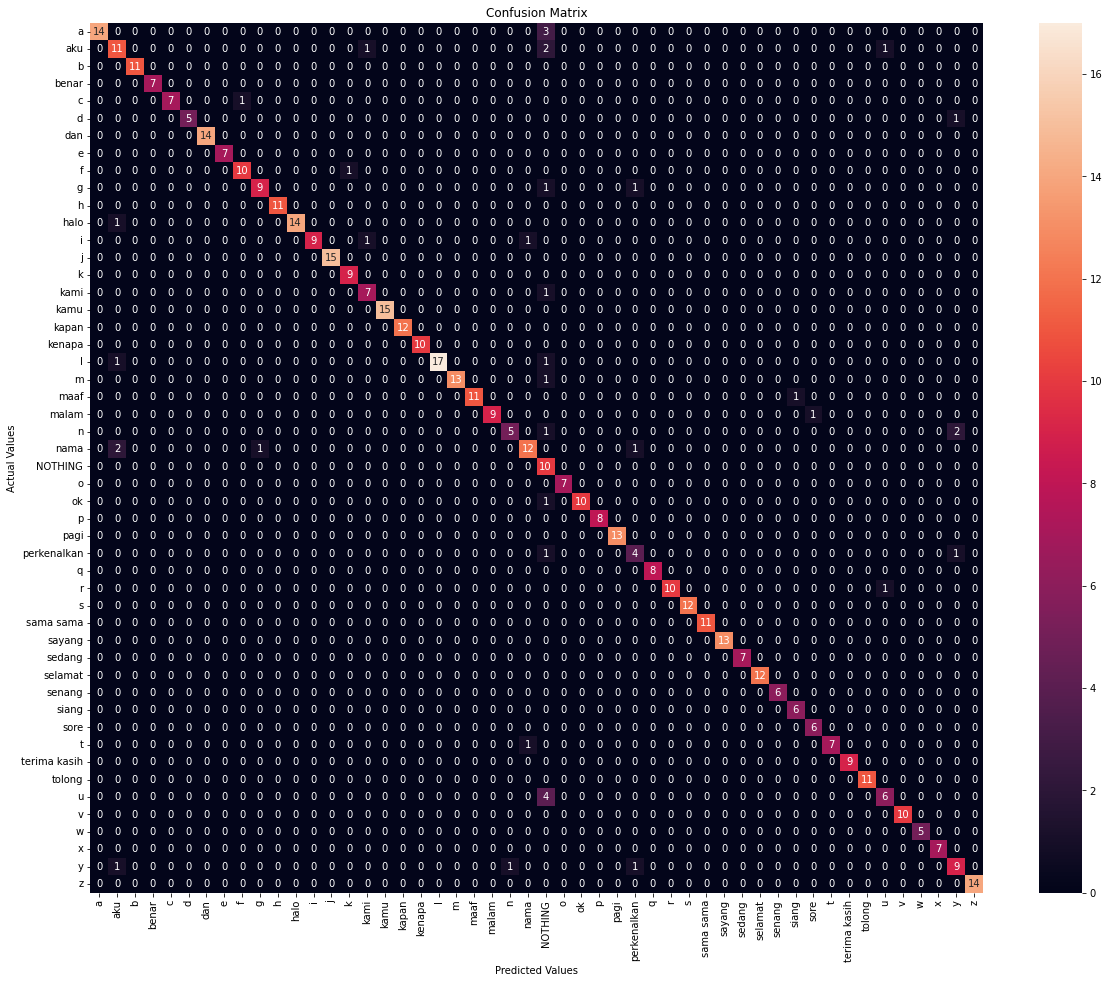

In [110]:
import pandas as pd
cm_df = pd.DataFrame(confussionMatrix,
                     index = actions, 
                     columns = actions)

import seaborn as sns
#Plotting the confusion matrix
plt.figure(figsize=(20,16))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


# 11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
frame_save = []

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_detect.mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        frame_save.append(frame)
        # Make detections
        image, results = mp_detect.mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        mp_detect.draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = mp_detect.extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-45:]
        
        if len(sequence) == 45:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            # if len(sentence) > 5: 
            #     sentence = sentence[-5:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)

        # cv2.rectangle(image, (0,0), (320, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    # clear = lambda: os.system('cls')
    # clear()
    print(sentence)

# Test using batch processing

In [8]:
sequence = []
sentence = []
predictions = []
threshold = 0.5
frame_save = []
i = 0

cap = cv2.VideoCapture("C:/Users/MDaniyalK/Documents/Work/2022/Tutur-ifest app/IMG_3705.mp4")
with mp_detect.mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # for frame_num in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    while True:
        # if frame_num > 3:
        ret, frame = cap.read()
        if ret:
            frame_save.append(frame)
        else:
            break

        # Make detections
        # image, results = mp_detect.mediapipe_detection(frame, holistic)
        # # print(results)
        
        # # Draw landmarks
        # mp_detect.draw_styled_landmarks(image, results)
        
        # # 2. Prediction logic
        # keypoints = mp_detect.extract_keypoints(results)
        # # 
        # # npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num-4))
        # # np.save(npy_path, keypoints)

        # sequence.append(keypoints)
        # sequence = sequence[-45:]
        
        # if len(sequence) == 45:
        #     res = model.predict(np.expand_dims(sequence, axis=0))[0]
        #     print(actions[np.argmax(res)])
        #     predictions.append(np.argmax(res))
            
            
        # #3. Viz logic
        #     if np.unique(predictions[-10:])[0]==np.argmax(res): 
        #         if res[np.argmax(res)] > threshold: 
                    
        #             if len(sentence) > 0: 
        #                 if actions[np.argmax(res)] != sentence[-1]:
        #                     sentence.append(actions[np.argmax(res)])
        #             else:
        #                 sentence.append(actions[np.argmax(res)])

        #     # if len(sentence) > 5: 
        #     #     sentence = sentence[-5:]

        #     # Viz probabilities
        #     # image = prob_viz(res, actions, image, colors)

        # # cv2.rectangle(image, (0,0), (320, 40), (245, 117, 16), -1)
        # cv2.putText(image, ' '.join(sentence), (3,30), 
        #                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        # cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
                
    cap.release()
    cv2.destroyAllWindows()
    clear = lambda: os.system('cls')
    clear()

print(sentence)

[]


In [12]:
print('length : {} frames'.format(len(frame_save)))
print(frame_save)

length : 593 frames
[array([[[ 25,  34,  35],
        [ 25,  34,  35],
        [ 25,  34,  35],
        ...,
        [ 10,  18,  17],
        [ 11,  19,  18],
        [ 11,  19,  18]],

       [[ 25,  34,  35],
        [ 25,  34,  35],
        [ 25,  34,  35],
        ...,
        [ 10,  18,  17],
        [ 11,  19,  18],
        [ 11,  19,  18]],

       [[ 25,  34,  35],
        [ 25,  34,  35],
        [ 25,  34,  35],
        ...,
        [ 10,  18,  17],
        [ 11,  19,  18],
        [ 11,  19,  18]],

       ...,

       [[ 23,  33,  37],
        [ 29,  39,  43],
        [ 37,  47,  51],
        ...,
        [121, 145, 155],
        [121, 145, 155],
        [121, 145, 155]],

       [[ 26,  36,  40],
        [ 33,  43,  47],
        [ 42,  52,  56],
        ...,
        [121, 145, 155],
        [121, 145, 155],
        [121, 145, 155]],

       [[ 32,  42,  46],
        [ 40,  50,  54],
        [ 50,  60,  64],
        ...,
        [121, 145, 155],
        [121, 145, 155],
   

In [13]:
from utils.extractor import Extractor

In [15]:
extract = Extractor()
print(extract.actions)

['halo' 'nama' 'aku' 'perkenalkan' 'r' 'kami' 'd' 'a' 'n' 'i' 'y' 'l' 'u'
 'g' 'm' 'NOTHING']


In [25]:
def frames_to_keypoint(frames, len_frame):
        #TODO: Create frames to keypoint detection from model (batch processing)
        keypoints = []
        predictions = []
        model = Sequential()
        model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(45,174)))
        model.add(Dropout(0.5))
        model.add(LSTM(128, return_sequences=True, activation='relu'))
        # model.add(LSTM(128, return_sequences=False, activation='relu'))
        model.add(Flatten())
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(16, activation='softmax'))
        
        model.load_weights('model_6.h5')
        
        with mp_detect.mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            for i in range(len_frame):
                image, results = mp_detect.mediapipe_detection(frames[i], holistic)
                keypoint = mp_detect.extract_keypoints(results)
                keypoints.append(keypoint)
                keypoints = keypoints[-45:]
                if len(keypoints) == 45:
                    res = model.predict(np.expand_dims(keypoints, axis=0))[0]
                    if len(predictions) > 0:
                        if predictions[len(predictions)-1] != extract.actions[np.argmax(res)]:
                            predictions.append(extract.actions[np.argmax(res)])
                            # keypoints = keypoints[-43:]
                            # i+=2
                        else:
                            i += 5
                            keypoints = keypoints[-35:]
                    else:
                        predictions.append(extract.actions[np.argmax(res)])
                        # keypoints = keypoints[-43:]
                        # i+=2
        
        return predictions

In [16]:

output = extract.frames_to_keypoint(frame_save, len(frame_save))

1/1 [==============================] - 0s 37ms/step


In [17]:
print(output)

['a', 'halo', 'a', 'g', 'd', 'a', 'g', 'perkenalkan', 'm', 'nama', 'm']


In [ ]:
from skimage.metrics import structural_similarity as ssim
sequence = []
sentence = []
predictions = []
threshold = 0.5
isStart = False
frame = frame_save
with mp_detect.mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for i in range(len(frame)):
        if i > 0:
            if count > 44:
                isStart == False
            if (isStart == False):
                count = 0
                simlarityIndex = ssim(frame[i-1], frame[i], multichannel = True)
            if simlarityIndex < 0.8 and count < 45:
                isStart == True
                print("motion detected")
                # Make detections
                image, results = mp_detect.mediapipe_detection(frame[i], holistic)
                print(results)
                
                # Draw landmarks
                mp_detect.draw_styled_landmarks(image, results)
                
                # 2. Prediction logic
                keypoints = mp_detect.extract_keypoints(results)
                # 
                # npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num-4))
                # np.save(npy_path, keypoints)

                sequence.append(keypoints)
                # sequence = sequence[-45:]
                
                if len(sequence) == 45:
                    res = model.predict(np.expand_dims(sequence, axis=0))[0]
                    print(actions[np.argmax(res)])
                    predictions.append(np.argmax(res))
                    sequence = []
                    
                    
                #3. Viz logic
                    if np.unique(predictions[-10:])[0]==np.argmax(res): 
                        if res[np.argmax(res)] > threshold: 
                            
                            if len(sentence) > 0: 
                                if actions[np.argmax(res)] != sentence[-1]:
                                    sentence.append(actions[np.argmax(res)])
                            else:
                                sentence.append(actions[np.argmax(res)])

                    # if len(sentence) > 5: 
                    #     sentence = sentence[-5:]

                    # Viz probabilities
                    # image = prob_viz(res, actions, image, colors)
                    

                count+=1
                
            i+=1

print(sentence)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 45, 128)           155136    
                                                                 
 dropout (Dropout)           (None, 45, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 45, 128)           131584    
                                                                 
 flatten (Flatten)           (None, 5760)              0         
                                                                 
 dense (Dense)               (None, 256)               1474816   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                1

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
frame_save = []

cap = cv2.VideoCapture("C:/Users/MDaniyalK/Documents/Work/2022/Tutur-ifest app/IMG_3705.mp4")
# Set mediapipe model 
with mp_detect.mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while True:

        # Read feed
        ret, frame = cap.read()
        # while ret == True:
            
        b = cv2.resize(frame,(720,1280),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
        # Make detections
        frame = b
        image, results = mp_detect.mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        mp_detect.draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = mp_detect.extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-45:]
        
        if len(sequence) == 45:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            # if len(sentence) > 5: 
            #     sentence = sentence[-5:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)

        # cv2.rectangle(image, (0,0), (320, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        # cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    clear = lambda: os.system('cls')
    clear()
    print(sentence)